In [2]:
from tokeniser import Tokeniser
from load_text import load_prideandprejudice, load_warandpeace
import os

/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-17 18:00:09.527585: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-17 18:00:09.551904: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 18:00:10.013722: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorR

# Create tokens

In [1]:
vocab_size = 1000 #Size of the vocabulary
vec_dim = 100
window_size = 8
epochs = 10
text_length = 50000
dataset = "warandpeace"
method = "cbow"

In [ ]:
# Load text
tokeniser_savename = f'vocab_{str(vocab_size)}_{str(dataset)}.json'
text = load_prideandprejudice(text_length)

# Check if tokeniser has been saved to disk
if os.path.exists(tokeniser_savename):
    # Load tokeniser from disk
    print("Loading tokeniser from '%s'..." % (tokeniser_savename))
    tokeniser = Tokeniser.load(tokeniser_savename)
else:
    # Create a new tokeniser, train it on the text and save it to disk
    tokeniser = Tokeniser(vocab_size=vocab_size)
    print("Building BPE tokeniser...")
    tokeniser.train(text, verbose=True)
    print("Saving tokeniser to '%s'..." % (tokeniser_savename))
    tokeniser.save(tokeniser_savename)

ids = tokeniser.encode(text, verbose=True)
tokeniser.plot(ids=ids)


# Do Word 2 Vec

### Get Embeddings and save them to file

In [4]:
from tok2vec import tok2Vec
# x = model.get_embeddings()
tok2vec_savename = f'tok2vec_{vocab_size}_{vec_dim}_{text_length}_{window_size}_{epochs}_{method}_{dataset}'
w, history = tok2Vec(vocab_size, ids, window_size, vec_dim, epochs, method=method, savename=tok2vec_savename)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               100000    
                                                                 
 dense_1 (Dense)             (None, 1000)              100000    
                                                                 
Total params: 200000 (781.25 KB)
Trainable params: 200000 (781.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10


2024-05-17 18:00:19.028822: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 18:00:19.049102: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 18:00:19.049208: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

 108/2708 [>.............................] - ETA: 2s - loss: 6.5167 - accuracy: 0.0787       

I0000 00:00:1715925624.294411  750639 service.cc:145] XLA service 0x739969166d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715925624.294436  750639 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2024-05-17 18:00:24.297677: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-17 18:00:24.305707: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1715925624.332776  750639 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2708/2708 [==============================] - 10s 2ms/step - loss: 5.1983 - accuracy: 0.1729 - val_loss: 4.9582 - val_accuracy: 0.1940
Epoch 2/10
2708/2708 [==============================] - 4s 1ms/step - loss: 4.4812 - accuracy: 0.2279 - val_loss: 4.5576 - val_accuracy: 0.2165
Epoch 3/10
2708/2708 [==============================] - 4s 1ms/step - loss: 3.9622 - accuracy: 0.2685 - val_loss: 4.2942 - val_accuracy: 0.2408
Epoch 4/10
2708/2708 [==============================] - 3s 1ms/step - loss: 3.5665 - accuracy: 0.3121 - val_loss: 4.1272 - val_accuracy: 0.2581
Epoch 5/10
2708/2708 [==============================] - 3s 1ms/step - loss: 3.2725 - accuracy: 0.3483 - val_loss: 4.0341 - val_accuracy: 0.2669
Epoch 6/10
2708/2708 [==============================] - 4s 1ms/step - loss: 3.0540 - accuracy: 0.3768 - val_loss: 3.9916 - val_accuracy: 0.2750
Epoch 7/10
2708/2708 [==============================] - 3s 1ms/step - loss: 2.8847 - accuracy: 0.3996 - val_loss: 3.9793 - val_accuracy: 0.2772
Ep

/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


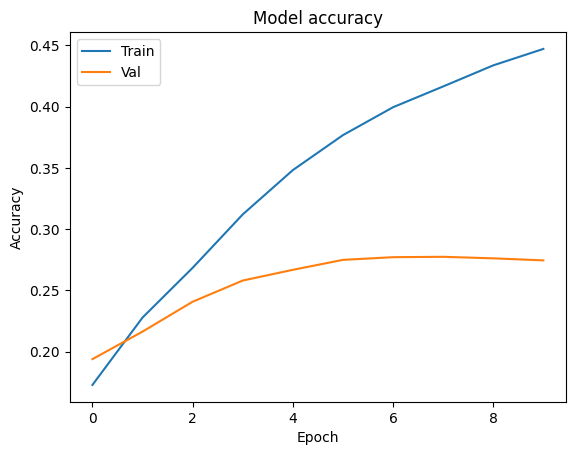

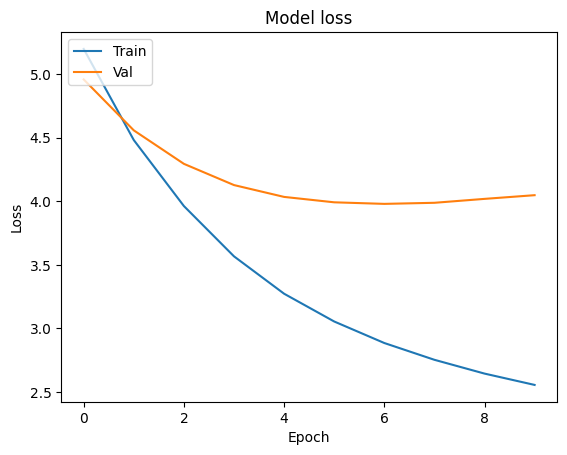

In [6]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# plot loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Plotting word vectors in 2D using t-SNE...


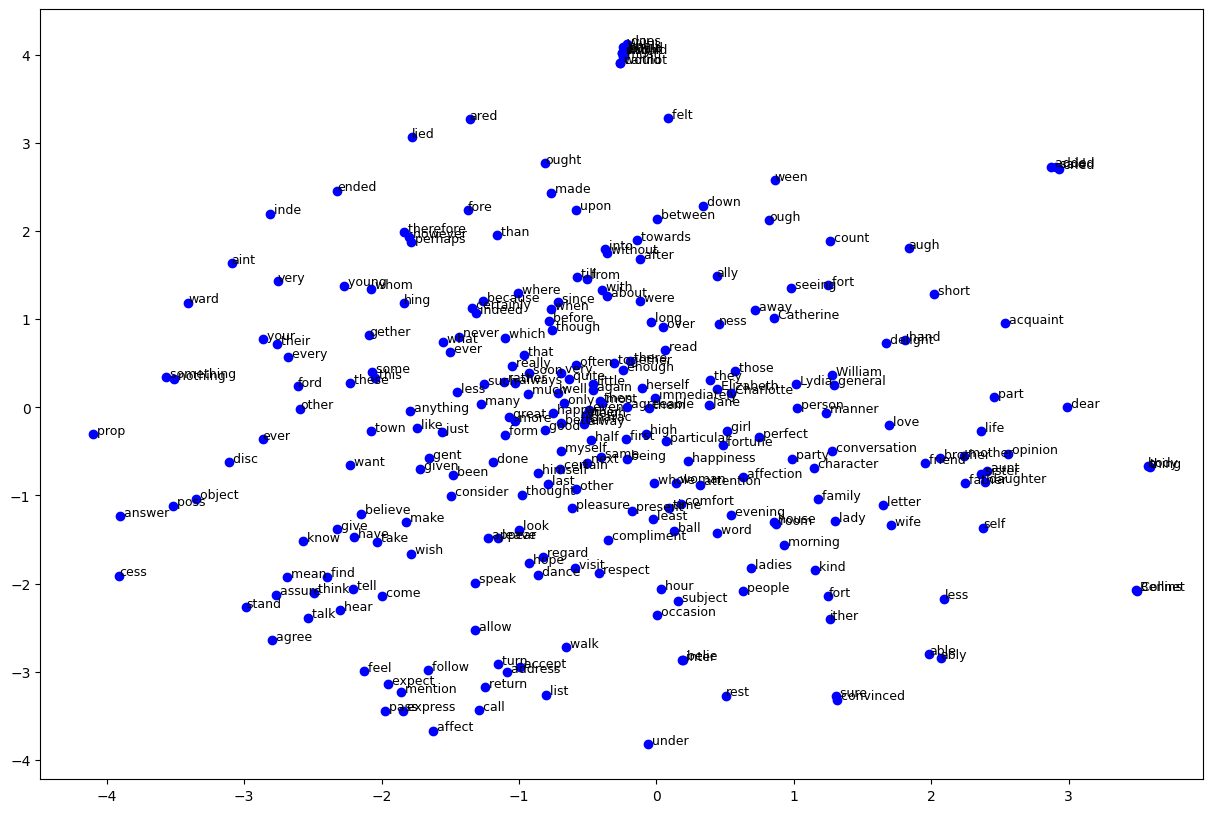

In [7]:
from tokeniser import plot_tok2vec
plot_tok2vec(w, tokeniser.word_index, num_words_to_show=500, figsize=(15, 10))

# Transformer

In [8]:
from transformer import *

seq_len = 128    

train_data = predictTextDataGenerator(ids=ids, seq_len=seq_len, batch_size=32)

# Create a new sequential model
model = tf.keras.models.Sequential()
model.add(FixedEmbedding(w, seq_len))
# model.add(OneHotEmbedding(vocab_size, seq_len))
model.add(PositionalEncoding(vec_dim=vec_dim, seq_len=seq_len))
model.add(TransformerLayer(vec_dim=vec_dim, key_dim=32, num_heads=8, dff=256))
# model.add(TransformerLayer(vec_dim=vec_dim, key_dim=32, num_heads=8, dff=256))
# model.add(TransformerLayer(vec_dim=vec_dim, key_dim=32, num_heads=8, dff=256))
# model.add(TransformerLayer(vec_dim=vec_dim, key_dim=32, num_heads=8, dff=256))
# model.add(TransformerLayer(vec_dim=vec_dim, key_dim=32, num_heads=8, dff=256))
# model.add(TransformerLayer(vec_dim=vec_dim, key_dim=32, num_heads=8, dff=256))
model.add(tf.keras.layers.Dense(vocab_size, activation='softmax'))

learning_rate = CustomSchedule(vec_dim)
opt = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                    epsilon=1e-9)

model.compile(optimizer=opt,
                loss=masked_loss,
                metrics=[masked_accuracy])
model.summary()
model.fit(train_data, epochs=epochs)
model.save(f'transformer_{seq_len}_{tok2vec_savename}.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fixed_embedding (FixedEmbe  (None, 128, 100)          0         
 dding)                                                          
                                                                 
 positional_encoding (Posit  (None, 128, 100)          0         
 ionalEncoding)                                                  
                                                                 
 transformer_layer (Transfo  (None, 128, 100)          155224    
 rmerLayer)                                                      
                                                                 
 dense_4 (Dense)             (None, 128, 1000)         101000    
                                                                 
Total params: 256224 (1000.88 KB)
Trainable params: 256224 (1000.88 KB)
Non-trainable params: 0 (0.00 Byte)
____________

/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


NotImplementedError: 
Layer FixedEmbedding was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config

In [11]:
model.save(f'transformer_{seq_len}_{tok2vec_savename}.h5')


NotImplementedError: 
Layer FixedEmbedding was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config

In [9]:
import sys
def generate(prompt):
    print(prompt, end='')
    sys.stdout.flush()

    # Encode prompt to tokens
    tokens = tokeniser.encode(prompt)

    for i in range(1,100):
        # Check if prompt is more than seq_len, if so, truncate, grabbing the
        # last seq_len tokens
        if len(tokens) >= seq_len:
            tokens = tokens[-seq_len:]
        # Index of the last token, which is going to be the 
        # index of the output stream that we are going to use for prediction
        j = len(tokens)-1

        # If the prompt is less than seq_len, pad it with zeros
        if len(tokens) < seq_len:
            x = np.concatenate([tokens,np.zeros((seq_len-len(tokens)),dtype='int')], axis=0)
        else:
            x = np.array(tokens)

        # Since the transformer expect input to be of shape (num_examples, seq_len), and
        # at this point x is just a vector of seq_len integers, we need to add a dimension
        # to change x to a tensor of shape (1, seq_len)     
        x = np.expand_dims(x,axis=0)

        # Compute output of the transformer
        y = model.predict(x,verbose=False)
        # The output will be of dmension (1, seq_len, vocab_size), but we are only interested in
        # the token that follow the prompt, at position j in the output stream.  
        # And so y[:,j,:] is a (1, vocab_size) tensor of probabilities of the next token in the sequence.
        # and we want to find the token with the highest probability.
        y = np.argmax(y[:,j,:])
        
        # Decode the token back to text
        t = tokeniser.decode(y)
        # Print it
        print(t, end='')
        sys.stdout.flush()
        # Apend the token (integer) to the prompot tokens
        tokens.append(y)

    print("\n")

generate("Well, Prince, so Genoa and Lucca are now just family estates of the")

Well, Prince, so Genoa and Lucca are now just family estates of the

2024-05-17 18:04:14.881717: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '_MklLayerNorm' OpKernel for GPU devices compatible with node {{node sequential_1/transformer_layer/feed_forward/layer_normalization_1/add}}
	.  Registered:  device='CPU'; T in [DT_HALF]
  device='CPU'; T in [DT_BFLOAT16]
  device='CPU'; T in [DT_FLOAT]

2024-05-17 18:04:14.883198: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '_MklLayerNorm' OpKernel for GPU devices compatible with node {{node sequential_1/transformer_layer/multihead_self_attention/layer_normalization/add}}
	.  Registered:  device='CPU'; T in [DT_HALF]
  device='CPU'; T in [DT_BFLOAT16]
  device='CPU'; T in [DT_FLOAT]



NotFoundError: Graph execution error:

Detected at node sequential_1/transformer_layer/multihead_self_attention/layer_normalization/add defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_748842/1039112954.py", line 47, in <module>

  File "/tmp/ipykernel_748842/1039112954.py", line 30, in generate

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 2650, in predict

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 2436, in predict_function

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 2421, in step_function

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 2409, in run_step

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 2377, in predict_step

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 588, in __call__

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_fileh2xtd8iw.py", line 34, in error_handler

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/sequential.py", line 394, in call

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/sequential.py", line 397, in call

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/functional.py", line 514, in call

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/functional.py", line 661, in _run_internal_graph

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/functional.py", line 663, in _run_internal_graph

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/functional.py", line 663, in _run_internal_graph

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/functional.py", line 663, in _run_internal_graph

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/functional.py", line 671, in _run_internal_graph

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_fileh2xtd8iw.py", line 34, in error_handler

  File "/home/jet/csoc420_assignment2/transformer.py", line 288, in call

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_fileh2xtd8iw.py", line 34, in error_handler

  File "/home/jet/csoc420_assignment2/transformer.py", line 223, in call

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_fileh2xtd8iw.py", line 34, in error_handler

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/layers/normalization/layer_normalization.py", line 280, in call

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/layers/normalization/layer_normalization.py", line 342, in call

  File "/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/layers/normalization/layer_normalization.py", line 343, in call

No registered '_MklLayerNorm' OpKernel for 'GPU' devices compatible with node {{node sequential_1/transformer_layer/multihead_self_attention/layer_normalization/add}}
	.  Registered:  device='CPU'; T in [DT_HALF]
  device='CPU'; T in [DT_BFLOAT16]
  device='CPU'; T in [DT_FLOAT]

	 [[sequential_1/transformer_layer/multihead_self_attention/layer_normalization/add]] [Op:__inference_predict_function_245104]